# Soccer Score prediction Using simple Linear regression 

The dataset used is the soccer player dataset. It has information about various players
from different clubs, and it provides data over ten features with a number of goals as the
target variable.

* This project starts with a real-life example for regression analysis, with an introduction to simple and multiple linear regression. Building the statistical foundation for the regression, it gives you a brief idea of the formula of regression. * With this background, the first regression model in python is built. Going through the interpolation and extrapolation also explains errors in regression and Lurking variables. 
* The point estimators of mean and variance and distributions of underlying parameters are also discussed. 
* The coefficient of determination is also known, and R squared is briefly explained. The project ends with diagnostics and remedial measures for regression with a practical explanation.

### Over here our target variable is the score, and we need to predict the score based on the previous history 

# Data Exploration

### Importing the libraries

In [6]:
# Import the libraries
# Import numpy
# Import Pandas
# Import matplolib
# Import tain test split
# Import stats models
# Import seaborn
# Import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### Loading the data set

In [7]:
# Import SoccerData as df
df=pd.read_csv("C:/Users/ACER/Desktop/Srushti/DATA SCIENCE/Statistics & ML class notes/Machine Learning projects/Soccer goal prediction/Data/SoccerData.csv")
df

# Display the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


### Write what are the details you understood from the info() 
* First read the data from csv file.
* info() method provides the concise summary of a dataframe including the number of non-null entries.
* Also, shows the data types of each column, memory usage, and column names.
* Store the data in df(dataframe) variable.

In [8]:
# Use describe function to display the important features of df 
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


#### What did we understand with describe()
* describe() method in pandas provides summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartile values.
* Store it in the df variable.
* It helps understand the distribution and central tendencies of the dataset.
* It’s a powerful tool for performing a quick exploratory data analysis.


In [9]:
# Display the co relation between the variables
df.corr

<bound method DataFrame.corr of                          PlayerName Club  DistanceCovered(InKms)  Goals  \
0           Braund, Mr. Owen Harris  MUN                    3.96    7.5   
1          Allen, Mr. William Henry  MUN                    4.41    8.3   
2                  Moran, Mr. James  MUN                    4.14    5.0   
3           McCarthy, Mr. Timothy J  MUN                    4.11    5.3   
4    Palsson, Master. Gosta Leonard  MUN                    4.45    6.8   
..                              ...  ...                     ...    ...   
197               Ryan, Mr. Patrick  LIV                    4.90    7.6   
198                  Saad, Mr. Amin  LIV                    5.66    8.3   
199                Saad, Mr. Khalil  LIV                    5.03    6.4   
200           Saade, Mr. Jean Nassr  LIV                    4.97    8.8   
201            Sadlier, Mr. Matthew  LIV                    5.38    6.3   

     MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  

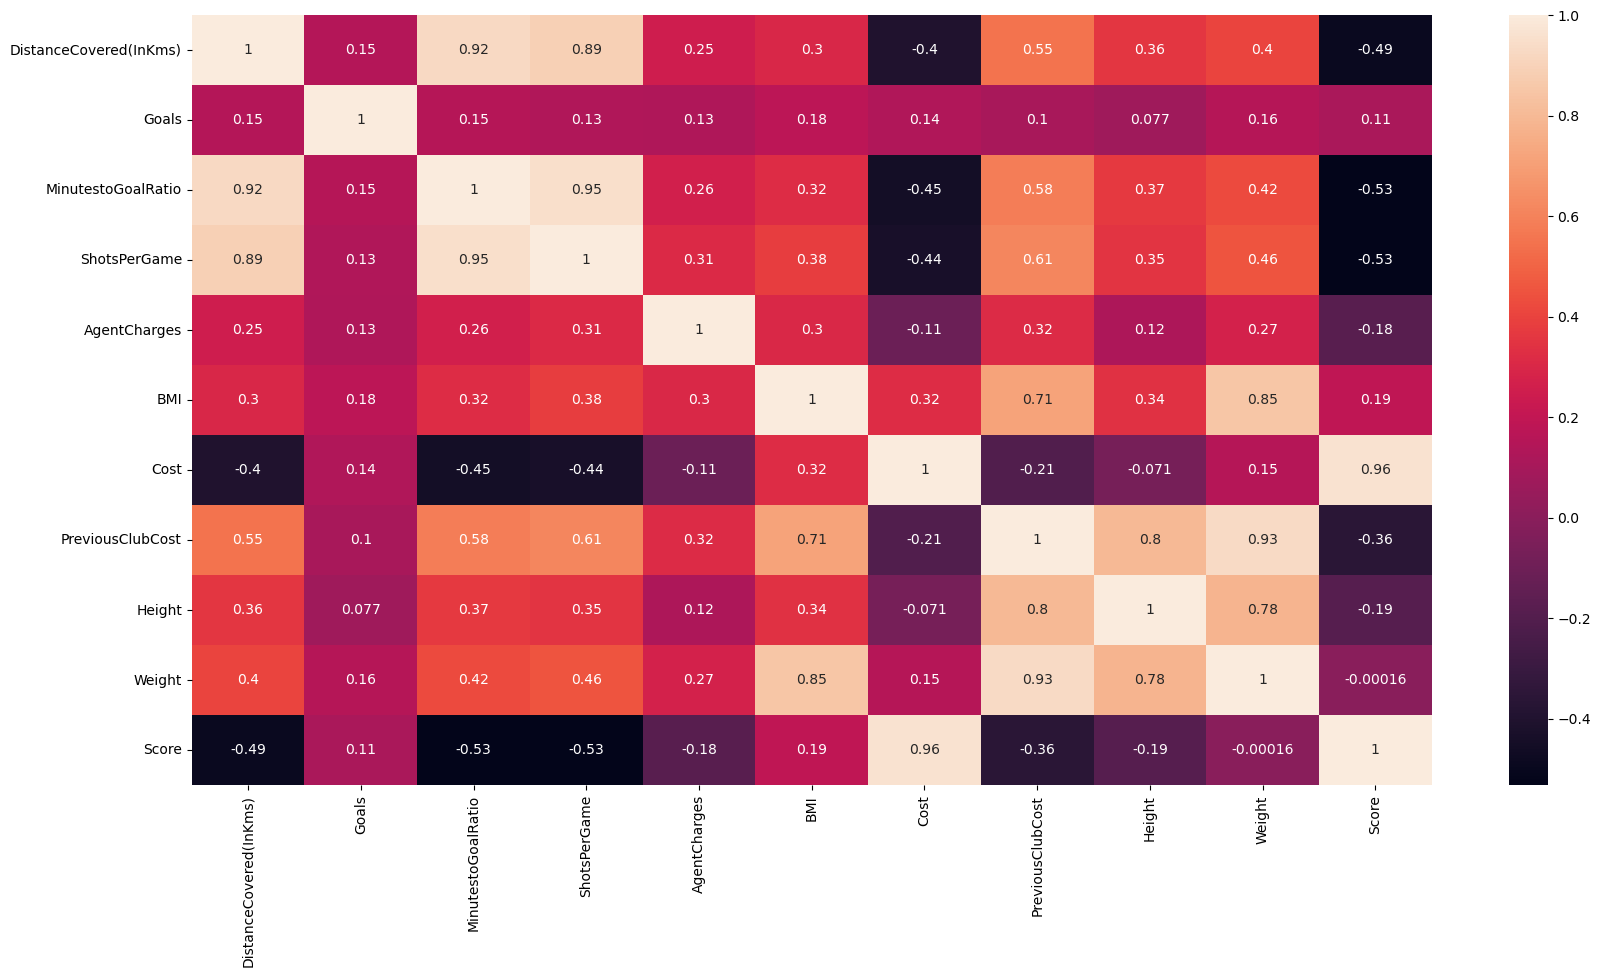

In [10]:
# Plot the heat map 
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)
plt.show()

#### What did we understand from the .corr() and the heat map
* .corr() method describes the pairwise correlation of columns in a dataframe, excluding NA/null values.
* It returns a correlation matrix using methods like pearson.
* Heatmap shows visually represent correlation matrix of all numerical columns in a dataframe.
* Heatmap displays correlation values between -1 and 1 with annotations.


# Data Visualization

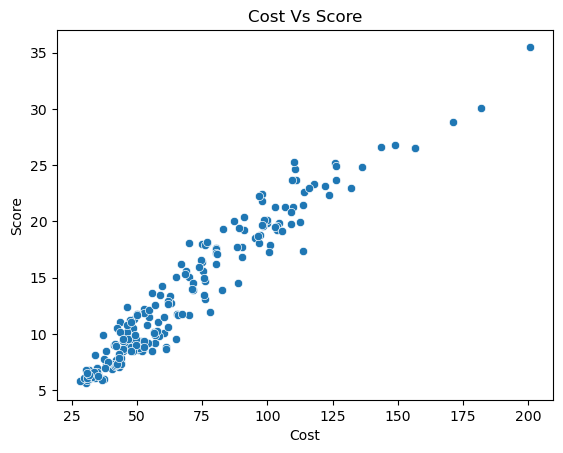

In [11]:
# Plot a scatter plot between Cost and Score, Let x be Cost and y be Score
sns.scatterplot(x="Cost", y="Score", data=df)
plt.title("Cost Vs Score")
plt.show()

#### What did we understand from the above plot?
* Above scatter plot showing the relationship between Cost (x-axis) and Score (y-axis) from the dataframe(df).
* Each point represents a data entry, helping to visualize trends, patterns, or correlations such as whether higher cost is associated with higher or lower scores.

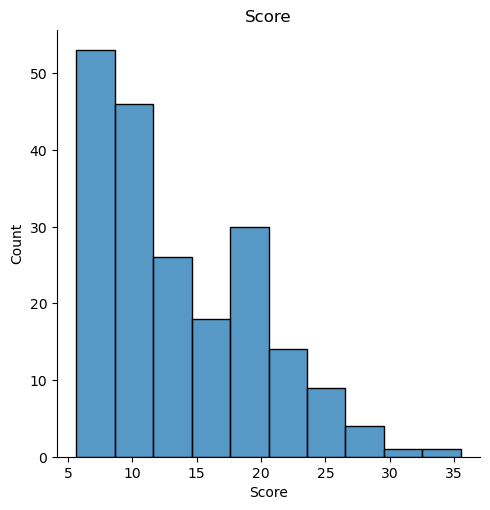

In [12]:
# Plot the displot of Score
sns.displot(df["Score"])
plt.title("Score")
plt.show()

#### What did we understand from the above displot?
*  displot method creates a histogram to visualiza the distribution of values in the Score column.

# Data cleaning

## List some of the common methods used to remove the outliers

* Z-Score Method
* IQR (InterQuartile Range)
* Percentile Capping
* Boxplot Visualization


#### Checking for outliers in Score using InterQuartile Range method

In [14]:
# Write a code to find the outliers in the dataset
outlier_info = {}

for Score in df.select_dtypes(include='number'):
    Q1 = df[Score].quantile(0.25)
    Q3 = df[Score].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[Score] < lower_bound) | (df[Score] > upper_bound)]
    print(f"Outliers in '{Score}':")
    print(outliers[[Score]])
    print("\n")

outlier_info[Score] = {
        "Number of Outliers": outliers.shape[0],
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Values": outliers[Score].tolist()
    }
for col, info in outlier_info.items():
    print(f"\nColumn: {col}")
    print(f"Number of Outliers: {info['Number of Outliers']}")
    print(f"Lower Bound: {info['Lower Bound']:.2f}")
    print(f"Upper Bound: {info['Upper Bound']:.2f}")
    print(f"Example Outlier Values: {info['Outlier Values'][:5]}")

Outliers in 'DistanceCovered(InKms)':
     DistanceCovered(InKms)
165                    6.72


Outliers in 'Goals':
     Goals
35    13.3
185   12.9
186   12.7
193   14.3


Outliers in 'MinutestoGoalRatio':
     MinutestoGoalRatio
165                59.7


Outliers in 'ShotsPerGame':
     ShotsPerGame
165          19.2


Outliers in 'AgentCharges':
     AgentCharges
92            182
121           183
161           212
163           213
170           184
173           220
174           191
176           189
178           212
182           234
194           214
200           233


Outliers in 'BMI':
       BMI
74   31.93
144  29.97
159  32.52
161  30.18
162  34.42
177  33.73
178  30.18


Outliers in 'Cost':
     Cost
10  171.1
52  181.7
55  200.8


Outliers in 'PreviousClubCost':
     PreviousClubCost
162             106.0


Outliers in 'Height':
     Height
98    148.9
99    149.0
132   209.4


Outliers in 'Weight':
     Weight
98     37.8
132   113.7
159   111.3
162   123.2


Outlier

In [15]:
# Write a code to remove the outliers from the data set
df_cleaned = df.copy()

for column in df_cleaned.select_dtypes(include='number').columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
print("Shape after outlier removal:", df_cleaned.shape)
print(df_cleaned.head())

Shape after outlier removal: (201, 13)
                       PlayerName Club  DistanceCovered(InKms)  Goals  \
0         Braund, Mr. Owen Harris  MUN                    3.96    7.5   
1        Allen, Mr. William Henry  MUN                    4.41    8.3   
2                Moran, Mr. James  MUN                    4.14    5.0   
3         McCarthy, Mr. Timothy J  MUN                    4.11    5.3   
4  Palsson, Master. Gosta Leonard  MUN                    4.45    6.8   

   MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  \
0                37.5          12.3            60  20.56  109.1   
1                38.2          12.7            68  20.67  102.8   
2                36.4          11.6            21  21.86  104.6   
3                37.3          12.6            69  21.88  126.4   
4                41.5          14.0            29  18.96   80.3   

   PreviousClubCost  Height  Weight  Score  
0             63.32   195.9    78.9  19.75  
1             58.55   189.7  

#### Please write some insight of outliers which you have found in the dataset
#### And Write which method you have chosed and explain why?
* We found outliers in columns like Goals, AgentCharges, BMI, and Score, indicating players with exceptional or unusual values.
* IQR method I have chosed because it’s robust, non-parametric, and doesn’t assume normal distribution.
* It’s simple, widely used, and ideal for detecting outliers in small to medium datasets like this one.
* This helped us uncover hidden patterns and extreme values that could impact model performance.

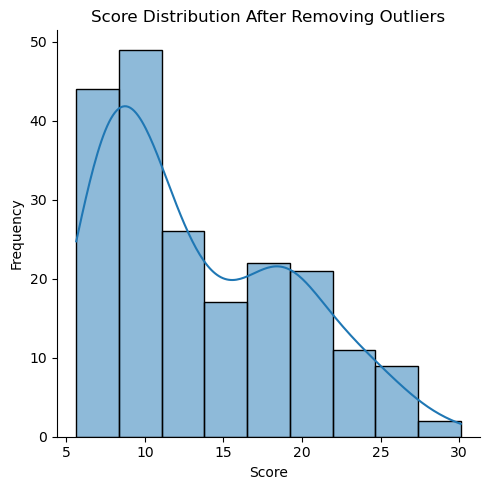

In [17]:
# Write a code to plot the displot of Score after removing the outliers
Q1 = df["Score"].quantile(0.25)
Q3 = df["Score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df["Score"] >= lower_bound) & (df["Score"] <= upper_bound)]

sns.displot(df_no_outliers["Score"], kde=True)
plt.title("Score Distribution After Removing Outliers")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Linear Regression

In [18]:
# Define the x variable as Cost
# Define the y variable as Score

x=df["Cost"]
y=df["Score"]

# Split the data into x_train, x_test, y_train, y_test 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80,
                                                    test_size = 0.20, random_state = 100)

#### Give the ratio in which you have split the data
* The data I split using an 80:20 ratio i.e. 80% of data used for training (x_train, y_train) and 20% of data used for testing (x_test, y_test).

In [19]:
# Fit the y_train and x_train into the model and save it as lr
# Display the summary of lr
lr = sm.OLS(y_train, x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.254e+04
Date:                Tue, 24 Jun 2025   Prob (F-statistic):                   6.59e-154
Time:                        20:29:36   Log-Likelihood:                         -317.06
No. Observations:                 161   AIC:                                      636.1
Df Residuals:                     160   BIC:                                      639.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1935      0.002    111.996      0.000       0.190       0.197
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.048
Skew:                           0.013   Prob(JB):                        0.976
Kurtosis:                       3.080   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Write the r2 score of the model
* The R² score of the model on the test data is 0.937, indicating that the model explains 93.7% of the variance in the Score based on Cost.

In [20]:
# Add the constant of x_train and save it as x_train_with_intercept
# Now fit the y_train and x_train_with_intercept into the model and save it as lr
# Display the lr summary

x_train_with_intercept = sm.add_constant(x_train) # Adding constant
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2090.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           2.22e-93
Time:                        20:29:40   Log-Likelihood:                -313.47
No. Observations:                 161   AIC:                             630.9
Df Residuals:                     159   BIC:                             637.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8594      0.319      2.696      0.008       0.230       1.489
Cost           0.1837      0.004     45.715      0.000       0.176       0.192
==============================================================================
Omnibus:                        3.817   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.835
Skew:                           0.345   Prob(JB):                        0.147
Kurtosis:                       2.690   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Write a code to predict the x_test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

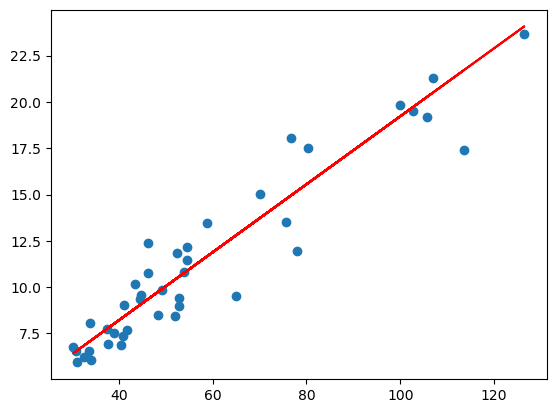

In [22]:
# Plot a graph of actual and the predicted values
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

## THANK YOU!